In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
#1. Relationship between Age, Income and Personal Loan
# Importing and reading excel file to dataframe
df = pd.read_excel("/Users/ag30103/Desktop/GBUS738/UniversalBank.xlsx", sheet_name='Data', delimiter=',', header=3, skiprows=0)
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [3]:
# Splitting df into groups based on Personal loan column value
df_grouped=df.groupby("Personal Loan")
group0=df_grouped.get_group(0)   # Not accepted
group1=df_grouped.get_group(1)   # Accepted

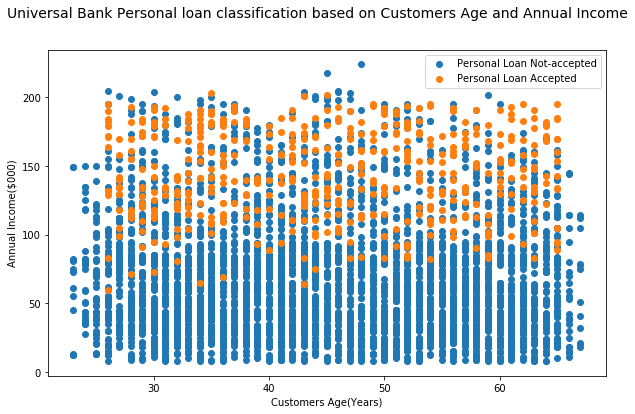

In [4]:
# plotting scatterplot on personal loan column based on Age and Income
fig = plt.figure(figsize=(10,6))
fig.suptitle('Universal Bank Personal loan classification based on Customers Age and Annual Income', fontsize=14)

plt.xlabel('Customers Age(Years)')
plt.ylabel('Annual Income($000)')

plt.scatter(group0["Age"],group0["Income"], label='Personal Loan Not-accepted')
plt.scatter(group1["Age"],group1["Income"], label='Personal Loan Accepted')
plt.legend()
plt.show()

In [5]:
#2. Build a logistic regression model to classify customers 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

clf = LogisticRegression()

df=df.drop(['ZIP Code'],axis =1)
df=df.drop(['ID'], axis =1)

x=df.drop(['Personal Loan'], axis =1)
#x=df[['Age','Experience','Income', 'Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']].values
y=df['Personal Loan'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
#a.The overall predictive accuracy of the model as well as the accuracy of each class
y_pred=clf.predict(x_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print('Confusion Matrix:\n ',cm)

accuracy=((1351+77)/(1351+21+51+77))*100
print('Model Accuracy(%):',round(accuracy,2))

accuracy_class0=(1351/(1351+21))*100
print('Accuracy for Not-Accepted Personal Loan class(%): ',round(accuracy_class0,2))

accuracy_class1=(77/(77+51))*100
print('Accuracy for Accepted Personal Loan class(%): ',round(accuracy_class1,2))

Confusion Matrix:
  [[1351   21]
 [  51   77]]
Model Accuracy(%): 95.2
Accuracy for Not-Accepted Personal Loan class(%):  98.47
Accuracy for Accepted Personal Loan class(%):  60.16


In [7]:
#c.target 100 customers randomly (i.e., without the aid of any predictive model)
random_subset = df.sample(n=100)
random_subset=pd.DataFrame(random_subset)

df_count=random_subset["Personal Loan"].value_counts()
Accepted=df_count.iloc[1]
print('Percentage of potentially accepted customers: ',Accepted)

Percentage of potentially accepted customers:  12


In [8]:
#d. select 100 customers with the highest probability of loan acceptance
y_prob=clf.predict_proba(x_test)
prob=y_prob[:,1].reshape(-1,1)
y_test=y_test.reshape(-1,1)

prob_test=np.append(prob,y_test,axis=1)
prob_test=prob_test[prob_test[:, 0].argsort()[::-1]]
prob_test=prob_test[0:100,:]

Accepted=int(prob_test[:,1].sum())
print('From a total of 100 customers with the highest probability of loan acceptance,\n',
      Accepted,'customers would potentially accept a personal loan offer.')

From a total of 100 customers with the highest probability of loan acceptance,
 77 customers would potentially accept a personal loan offer.


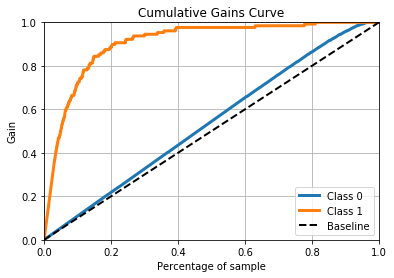

In [9]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_prob)
plt.show()

In [10]:
#e. percentage of customers who accepted the loan were incorrectly classified by the model
Incorrect_classified=(51/(51+77))*100
print('Percentage of customers who accepted the loan that were incorrectly classified by the model: ',
      round(Incorrect_classified,2))

Percentage of customers who accepted the loan that were incorrectly classified by the model:  39.84


In [11]:
#3.Develop a logistic regression model to classify customers
# default cutoff probability(0.5)
y_prob=clf.predict_proba(x_test)
prob=y_prob[:,1].reshape(-1,1)
y_test=y_test.reshape(-1,1)

predicted=[1 if i>0.5 else 0 for i in prob]
predicted=np.asarray(predicted)
predicted=predicted.reshape(-1,1)

prob_test=np.append(prob,y_test,axis=1)
prob_test=np.append(prob_test,predicted,axis=1)

prob_test=prob_test[prob_test[:, 0].argsort()[::-1]]

positive = prob_test[prob_test[:,1]==1, :]

true=(positive[:,1]==positive[:,2]).sum()
print(true/positive.shape[0])

0.6015625


In [12]:
# cutoff probability=0.27
y_prob=clf.predict_proba(x_test)
prob=y_prob[:,1].reshape(-1,1)
y_test=y_test.reshape(-1,1)

predicted=[1 if i>0.27 else 0 for i in prob]
predicted=np.asarray(predicted)
predicted=predicted.reshape(-1,1)

prob_test=np.append(prob,y_test,axis=1)
prob_test=np.append(prob_test,predicted,axis=1)

prob_test=prob_test[prob_test[:, 0].argsort()[::-1]]

positive = prob_test[prob_test[:,1]==1, :]

true=(positive[:,1]==positive[:,2]).sum()
print(true/positive.shape[0])

0.7109375
